<a href="https://colab.research.google.com/github/bnv20/cakd3/blob/main/dl_overfitting_and_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17473536/17464789 [==============================] - 0s 0us/step


In [15]:
x_train.shape
x_test.shape

(25000, 10000)

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
original_model.add(layers.Dense(16,activation='relu'))
original_model.add(layers.Dense(1,activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6,activation='relu',input_shape=(10000,)))
smaller_model.add(layers.Dense(6,activation='relu'))
smaller_model.add(layers.Dense(1,activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 3s 33ms/step - loss: 0.4703 - acc: 0.8123 - val_loss: 0.3490 - val_acc: 0.8795
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2654 - acc: 0.9097 - val_loss: 0.2994 - val_acc: 0.8832
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2037 - acc: 0.9274 - val_loss: 0.3011 - val_acc: 0.8797
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1692 - acc: 0.9399 - val_loss: 0.2941 - val_acc: 0.8843
Epoch 5/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1472 - acc: 0.9478 - val_loss: 0.3101 - val_acc: 0.8818
Epoch 6/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1291 - acc: 0.9553 - val_loss: 0.3385 - val_acc: 0.8739
Epoch 7/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1118 - acc: 0.9624 - val_loss: 0.3803 - val_acc: 0.8704
Epoch 8/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1013 - a

In [7]:
smaller_model_hist = smaller_model.fit(x_train,y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 36ms/step - loss: 0.5927 - acc: 0.7136 - val_loss: 0.5403 - val_acc: 0.8481
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.4785 - acc: 0.8540 - val_loss: 0.4733 - val_acc: 0.8430
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.4081 - acc: 0.9013 - val_loss: 0.4201 - val_acc: 0.8673
Epoch 4/20
49/49 [==============================] - 1s 20ms/step - loss: 0.3300 - acc: 0.9250 - val_loss: 0.3547 - val_acc: 0.8849
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2544 - acc: 0.9354 - val_loss: 0.3135 - val_acc: 0.8870
Epoch 6/20
49/49 [==============================] - 1s 21ms/step - loss: 0.2031 - acc: 0.9433 - val_loss: 0.2977 - val_acc: 0.8857
Epoch 7/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1712 - acc: 0.9498 - val_loss: 0.3001 - val_acc: 0.8811
Epoch 8/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1515 - a

In [9]:
epochs = range(1,21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

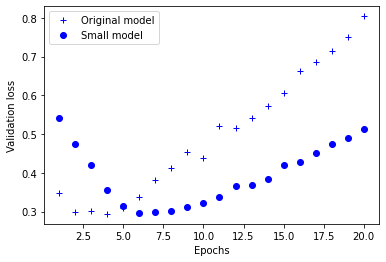

In [10]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Small model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [11]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024,activation='relu',input_shape=(10000,)))
bigger_model.add(layers.Dense(1024,activation='relu'))
bigger_model.add(layers.Dense(1,activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [12]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 8s 146ms/step - loss: 0.5561 - acc: 0.7995 - val_loss: 0.3030 - val_acc: 0.8754
Epoch 2/20
49/49 [==============================] - 6s 131ms/step - loss: 0.2206 - acc: 0.9109 - val_loss: 0.3157 - val_acc: 0.8701
Epoch 3/20
49/49 [==============================] - 6s 131ms/step - loss: 0.1181 - acc: 0.9554 - val_loss: 0.2940 - val_acc: 0.8848
Epoch 4/20
49/49 [==============================] - 7s 138ms/step - loss: 0.0631 - acc: 0.9842 - val_loss: 0.4437 - val_acc: 0.8854
Epoch 5/20
49/49 [==============================] - 7s 138ms/step - loss: 0.0027 - acc: 0.9994 - val_loss: 0.7952 - val_acc: 0.8576
Epoch 6/20
49/49 [==============================] - 6s 132ms/step - loss: 0.1988 - acc: 0.9847 - val_loss: 0.7236 - val_acc: 0.8367
Epoch 7/20
49/49 [==============================] - 6s 131ms/step - loss: 9.0024e-04 - acc: 0.9999 - val_loss: 0.7002 - val_acc: 0.8743
Epoch 8/20
49/49 [==============================] - 6s 131ms/step - loss

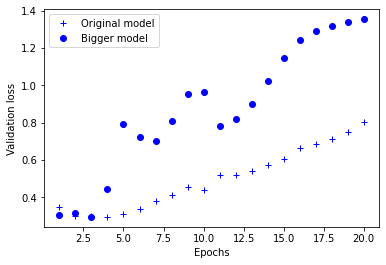

In [13]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

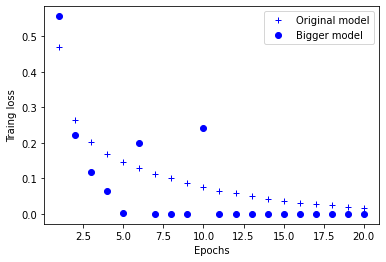

In [16]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs,original_train_loss,'b+',label='Original model')
plt.plot(epochs,bigger_model_train_loss,'bo',label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Traing loss')
plt.legend()
plt.show()

용량이 큰 네트워크는 훈련 손실이 빠르게 0에 가까워진다. 용량이 많은 네트워크일수록 더 빠르게 훈련 데이터를 모델링힐 수 있어서 훈련 손실이 낮아진다. 하지만 더욱 과대적합에 민감해진다.(훈련과 검증 손실 사이에 큰 차이가 발생)

In [18]:
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),
                          activation='relu',input_shape=(10000,)))
l2_model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1,activation='sigmoid'))

In [20]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [21]:
l2_model_hist = l2_model.fit(x_train,y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 30ms/step - loss: 0.5673 - acc: 0.8247 - val_loss: 0.4564 - val_acc: 0.8653
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3762 - acc: 0.8928 - val_loss: 0.3641 - val_acc: 0.8845
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3095 - acc: 0.9110 - val_loss: 0.3486 - val_acc: 0.8840
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2808 - acc: 0.9178 - val_loss: 0.3367 - val_acc: 0.8884
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2637 - acc: 0.9257 - val_loss: 0.3423 - val_acc: 0.8861
Epoch 6/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2532 - acc: 0.9288 - val_loss: 0.3510 - val_acc: 0.8820
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2441 - acc: 0.9344 - val_loss: 0.3487 - val_acc: 0.8843
Epoch 8/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2375 - a

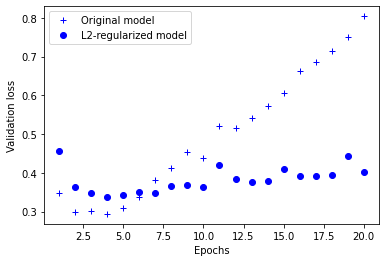

In [22]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs,original_val_loss,'b+',label='Original model')
plt.plot(epochs,l2_model_val_loss,'bo',label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

두 모델이 동일한 파라미터 수를 가지고 있더라도 L2 규제를 사용한 모델이 기본 모델 보다 훨씬 더 과대적합에 잘 견디고 있음

In [ ]:
# [과제] l1(0.001) 모델과 비교

In [23]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1,activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [24]:
dpt_model_hist = dpt_model.fit(x_train,y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 27ms/step - loss: 0.5920 - acc: 0.6935 - val_loss: 0.4426 - val_acc: 0.8666
Epoch 2/20
49/49 [==============================] - 1s 17ms/step - loss: 0.4449 - acc: 0.8244 - val_loss: 0.3380 - val_acc: 0.8833
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3576 - acc: 0.8693 - val_loss: 0.2960 - val_acc: 0.8876
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2986 - acc: 0.8963 - val_loss: 0.2934 - val_acc: 0.8857
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2589 - acc: 0.9123 - val_loss: 0.2866 - val_acc: 0.8833
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2274 - acc: 0.9242 - val_loss: 0.2957 - val_acc: 0.8881
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2030 - acc: 0.9336 - val_loss: 0.3096 - val_acc: 0.8844
Epoch 8/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1831 - a

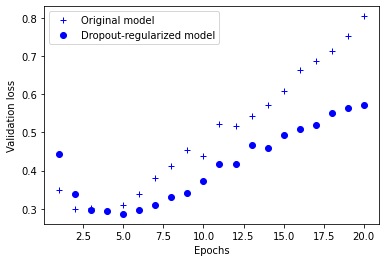

In [25]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']
plt.plot(epochs,original_val_loss,'b+',label='Original model')
plt.plot(epochs,dpt_model_val_loss,'bo',label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

신경망에서 과대적합을 방지하기 위한 방법
- 훈련 데이터를 더 모은다.
- 네트워크의 용량을 감소 시킨다.
- 가중치 규제를 추가한다.
- 드롭아웃을 추가한다.